In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df1=pd.read_csv("D:\ppt ds sem2\ML Lab\Iris.csv")

In [3]:
df1.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
df=sns.load_dataset('iris')
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [5]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df=df[df['species']!='setosa']

In [8]:
df.head()

sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor
53           5.5          2.3           4.0          1.3  versicolor
54           6.5          2.8           4.6          1.5  versicolor

In [9]:
df['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [10]:
df['species']=df['species'].map({'versicolor':0,'virginica':1})

In [11]:
df.head()

sepal_length  sepal_width  petal_length  petal_width  species
50           7.0          3.2           4.7          1.4        0
51           6.4          3.2           4.5          1.5        0
52           6.9          3.1           4.9          1.5        0
53           5.5          2.3           4.0          1.3        0
54           6.5          2.8           4.6          1.5        0

In [12]:
### split dataset into independent and dependent features
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
x

sepal_length  sepal_width  petal_length  petal_width
50            7.0          3.2           4.7          1.4
51            6.4          3.2           4.5          1.5
52            6.9          3.1           4.9          1.5
53            5.5          2.3           4.0          1.3
54            6.5          2.8           4.6          1.5
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[100 rows x 4 columns]

In [14]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(
x, y, test_size=0.25, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver = "liblinear")

In [17]:
from sklearn.model_selection import GridSearchCV 
parameter={'penalty':['l1','l2'], 'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [18]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [19]:
classifier_regressor.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [20]:
print(classifier_regressor.best_params_)

{'C': 2, 'max_iter': 100, 'penalty': 'l2'}


In [21]:
print(classifier_regressor.best_score_)

1.0


In [22]:
###prediction
y_pred=classifier_regressor.predict(x_test)

In [23]:
###accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [24]:
score=accuracy_score(y_pred,y_test)
print(score)

0.88


In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.79      0.88        14

    accuracy                           0.88        25
   macro avg       0.89      0.89      0.88        25
weighted avg       0.91      0.88      0.88        25



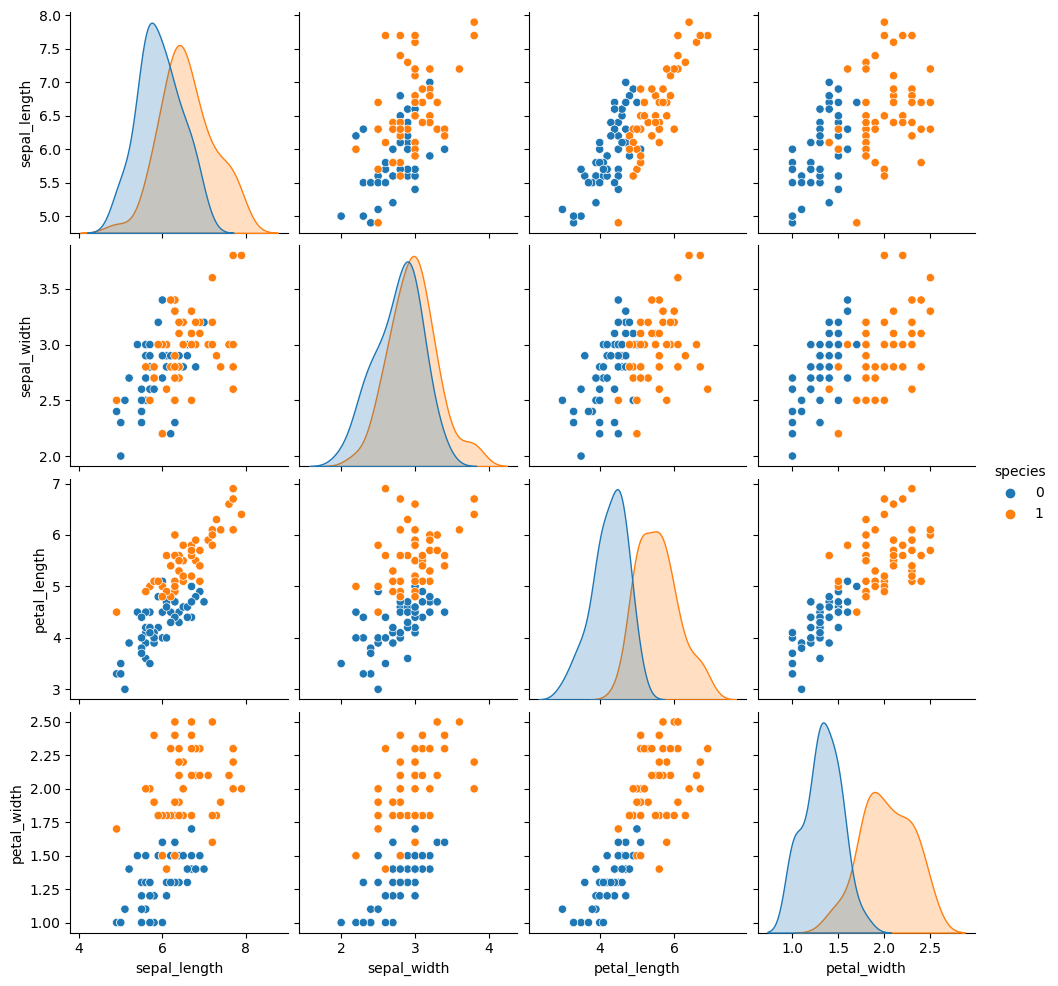

In [26]:
###EDA
sns.pairplot(df,hue='species')

In [27]:
df.corr()

sepal_length  sepal_width  petal_length  petal_width   species
sepal_length      1.000000     0.553855      0.828479     0.593709  0.494305
sepal_width       0.553855     1.000000      0.519802     0.566203  0.308080
petal_length      0.828479     0.519802      1.000000     0.823348  0.786424
petal_width       0.593709     0.566203      0.823348     1.000000  0.828129
species           0.494305     0.308080      0.786424     0.828129  1.000000